In [ ]:
# Bibliotecas utilizadas

import pandas as pd
import numpy as np
import math as m
from math import sqrt
import pprint
import scipy
import scipy.linalg
from scipy.linalg import cholesky, cho_solve
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.linalg import lu
from scipy.linalg import lu_solve, lu_factor
from scipy.optimize import fsolve
from scipy.linalg import lu_factor, lu_solve

# **Exercício 1**

In [ ]:
# a

n = 1000

# Criando uma matriz de zeros
A = np.zeros((n, n), dtype = np.float64)

# Iterando as linhas e colunas
for i in range(n):
  for j in range(n):
    if i == j: # Definindo a condição para adicionar valores na diagonal principal
      A[i][j] = 100
    elif i == j + 1 or j == i + 1: # Para as diagonais secundárias
      A[i][j] = -4
    elif i == j + 2 or j == i + 2: # Para as outras diagonais
      A[i][j] = 1

b = np.full((n, 1), 1/n**4) # Criando um vetor b com todas as coordenadas

print(A)

[[100.  -4.   1. ...   0.   0.   0.]
 [ -4. 100.  -4. ...   0.   0.   0.]
 [  1.  -4. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.  -4.   1.]
 [  0.   0.   0. ...  -4. 100.  -4.]
 [  0.   0.   0. ...   1.  -4. 100.]]


In [ ]:
# b

def cholesky(A):
     n = np.shape(A)[0]
     H = np.zeros((n,n)) # Criando uma matriz de zeros do mesmo tamanho da SPD original
     # Preenchendo a matriz H com os valores que satisfazem H*H.T = A
     for i in np.arange(n):
         for j in np.arange(i+1):
            tmp_sum = sum(H[i][k]*H[j][k]
            for k in np.arange(j))
            # Definindo condições para o preenchimento de H
            if (i == j):
                H[i][j] = sqrt(A[i][i] - tmp_sum) # Verificação de simetricidade
            else:
                H[i][j] = ((A[i][j] - tmp_sum)/H[j][j])

     return H # Imprimindo a matriz H da decomposição

B = np.array([[4, 1, 1], [1, 4,1], [1, 1, 4]],
              dtype='double')

cholesky(B) # Considerando A do item anterior

array([[2.        , 0.        , 0.        ],
       [0.5       , 1.93649167, 0.        ],
       [0.5       , 0.38729833, 1.8973666 ]])

In [ ]:
# c

# Resolvendo o Sistema Ax = b da forma H*H.T*x = b ou H*y = b
from scipy.linalg import solve

def cholesky_solve(A, b): # Criando um código para resolver o sistema linear
    H = cholesky(A)
    y = solve(H, b)
    x = solve( H.T, y)
    return x # Retornando o vetor x

x_chol = cholesky_solve(A, b)
x_chol

array([[1.03228419e-14],
       [1.07323449e-14],
       [1.06451885e-14],
       [1.06376292e-14],
       [1.06382023e-14],
       [1.06383008e-14],
       [1.06382989e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],
       [1.06382979e-14],


In [ ]:
# d

# Jacobi

def gauss_jacobi(A,b,x0,tol,flag):
    n = np.shape(A)[0]
    D = np.diag(np.diag(A))
    aux_C = np.linalg.solve(D,A)
    C = np.eye(n) - aux_C
    g = np.linalg.solve(D,b)
    kmax = 10000
    k = 0

    error = np.zeros(kmax)
    if flag:
      statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax) # Definindo condições de iteração: erro absoluto > tol e número de iterações < kmax
    else:
      statment = (k<kmax)

    while statment:
      error[k] = np.linalg.norm(b-A.dot(x0)) # Critério de parada( erro absoluto)
      k = k+1
      x0 = C.dot(x0)+g
      if flag:
        statment = (np.linalg.norm(b-A.dot(x0))>tol and k<kmax)
      else:
        statment = (k<kmax)

    if (k == kmax and flag):
      print('\nErro: o método não converge.\n')

    x = x0
    return x,k,error

# Função Python
print('\nSolução Python:\n')
x = np.linalg.solve(A, b)
print(x)

input()

# Método de Jacobi
n = np.shape(A)[0]
x0 = np.zeros(n)
tol = 1e-16
print('\nSolução Gauss-Jacobi:\n')
(x_jacobi,k_jacobi,erro_jacobi) = gauss_jacobi(A,b,x0,tol,1)
print(x_jacobi)
print('%d iterações usadas' %(k_jacobi))


Solução Python:

[[1.03228419e-14]
 [1.07323449e-14]
 [1.06451885e-14]
 [1.06376292e-14]
 [1.06382023e-14]
 [1.06383008e-14]
 [1.06382989e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.06382979e-14]
 [1.063829

In [ ]:
# e

# Métodos Iterativos: Jacobi
n = np.shape(A)[0]
x0 = np.zeros(n)
# Utilizando um erro muito pequeno, de modo a aumentar a precisão
tol = 1e-24 # Pode ser variado, o que leva a aumentos ou diminuições na precisão e número de iterações, bem como no tempo de execução
start = time.time()
print('\nSolução Gauss-Jacobi:\n')
(x_jacobi,k_jacobi,erro_jacobi) = gauss_jacobi(A,b,x0,tol,1)
print(x_jacobi)
print('%d iterações usadas' %(k_jacobi))
end = time.time()
tempo = end - start # Calculando o tempo de execução para a Jacoby

input()

print('O tempo de execução para a Jacobi foi de', tempo, 'segundos')

start = time.time()
cholesky_solve(A, b)
end = time.time()
tempo = end - start # Calculando o tempo de execução para Cholesky

print('O tempo de execução para Cholesky foi de', tempo, 'segundos')


Solução Gauss-Jacobi:

[[1.03228419e-14 1.03228419e-14 1.03228419e-14 ... 1.03228419e-14
  1.03228419e-14 1.03228419e-14]
 [1.07323449e-14 1.07323449e-14 1.07323449e-14 ... 1.07323449e-14
  1.07323449e-14 1.07323449e-14]
 [1.06451885e-14 1.06451885e-14 1.06451885e-14 ... 1.06451885e-14
  1.06451885e-14 1.06451885e-14]
 ...
 [1.06451885e-14 1.06451885e-14 1.06451885e-14 ... 1.06451885e-14
  1.06451885e-14 1.06451885e-14]
 [1.07323449e-14 1.07323449e-14 1.07323449e-14 ... 1.07323449e-14
  1.07323449e-14 1.07323449e-14]
 [1.03228419e-14 1.03228419e-14 1.03228419e-14 ... 1.03228419e-14
  1.03228419e-14 1.03228419e-14]]
13 iterações usadas

O tempo de execução para a Jacobi foi de 2.862243413925171 segundos
O tempo de execução para Cholesky foi de 158.96853017807007 segundos


In [ ]:
# Diferença entre a precisão da solução de Jacobi e relação a Cholesky

dif_precisão  = np.linalg.norm(x_jacobi - x_chol, ord = np.inf) # Como a diferença é igual a 0, temos que ambos possuem a mesma precisão
print('Precisão da solução de Jacobi em relação à Cholesky: %2.f' % dif_precisão)

Precisão da solução de Jacobi em relação à Cholesky:  0


É possível observar que, para a mesma precisão, o método de Jacobi convergiu muito mais rápido, o que corrobora a tese de que os métodos iterativos são melhores que os diretos para sistemas muito grandes e esparsados

In [ ]:
# f

#LU banda

import numpy as np
import time

def LU( A ):

    n = A.shape[ 0 ]

    U = A.copy()
    L = np.eye( n )

    for j in range( n - 1 ):

        for i in range( j + 1, n ):

            L[ i, j ] = U[ i, j ] / U[ j, j ]
            U[ i, j : n ] = U[ i, j : n ] - L[ i, j ] * U[ j, j : n ]

    return ( L, U )


def LU_banda( A, p ):

    n = A.shape[ 0 ]

    U = A.copy()
    L = np.eye( n )

    for j in range( n - 1 ):

        v = min( n, j + p + 1 )
        for i in range( j + 1, v ):

            L[ i, j ] = U[ i, j ] / U[ j, j ]
            U[ i, j : v ] = U[ i, j : v ] - L[ i, j ] * U[ j, j : v ]

    return ( L, U )


n = 1000
p = 2 #  largura de banda da matriz A

A = np.zeros( ( n, n ) )
for i in range( n ):
    for j in range( max( 0, i - p ), min( n, i + p + 1 ) ):
        A[ i, j ] = np.random.normal()


start = time.time()
( L, U ) = LU( A )
end = time.time()
time_LU = end - start
print('Tempo de execução para a decomposição LU:', time_LU, "segundos" )


start_time = time.time()
( L_banda, U_banda ) = LU_banda( A, p )
end_time = time.time()

tempo_cholbanda = end_time - start_time
print( "Tempo de execução para a decomposição Cholesky banda:", tempo_cholbanda, "segundos")
print("Erro de cálculo para a decomposição LU:", np.linalg.norm( L @ U - A ) )
print("Erro de cálculo para Cholesky banda:", np.linalg.norm( L_banda @ U_banda - A ) )

Tempo de execução para a decomposição LU: 4.381444454193115 segundos
Tempo de execução para a decomposição Cholesky banda: 0.02215862274169922 segundos
Erro de cálculo para a decomposição LU: 1.423485469838135e-13
Erro de cálculo para Cholesky banda: 1.423485469838135e-13


Utilizando a decomposição LU banda observada em sala de aula, podemos melhorar o tempo de execução de uma decomposição LU quando comparado com o método LU tradicional para matrizes grandes e esparsadas fazendo uso de uma matriz banda, o que também seria válido para uma decomposição de Cholesky, como podemos observar anterior. Assim, é possível observar uma melhoria significativa no tempo de execução ao utilizamos a decomposição Cholesky banda quando comparada com a decomposição LU, para um mesmo erro de cálculo.

## Exercício 2

**2.1**

In [ ]:
# a

# Fatoração PA = LU

def LU_decomposition(A):
    P, L, U = lu(A)
    return P, L, U

# Testando a função com uma matriz de exemplo
A = np.array([[1, 1, 6], [2, 4, 6], [4, 3, 8]])
P, L, U = LU_decomposition(A)

print('Matriz P:')
print(P)

print('Matriz L:')
print(L)

print('Matriz U:')
print(U)

Matriz P:
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
Matriz L:
[[1.   0.   0.  ]
 [0.5  1.   0.  ]
 [0.25 0.1  1.  ]]
Matriz U:
[[4.  3.  8. ]
 [0.  2.5 2. ]
 [0.  0.  3.8]]


In [ ]:
# b

# Resolvendo sistema linear

def solve_linear_system(A, b):
    LU, piv = lu_factor(A)
    X = lu_solve((LU, piv), b)
    return X

# Exemplo

A = np.array([[1, 1, 6], [2, 4, 6], [4, 3, 8]])
b = np.array([[1, 2], [3, 4], [4, 4]])
X = solve_linear_system(A, b)

print('Solução de x para o sistema linear Ax = b:')
print(X)

Matriz A:
[[1 1 6]
 [2 4 6]
 [4 3 8]]
Matriz b:
[[1 2]
 [3 4]
 [4 4]]
Solução de x para o sistema linear Ax = b:
[[ 0.73684211  0.10526316]
 [ 0.42105263  0.63157895]
 [-0.02631579  0.21052632]]


In [ ]:
# c

# Implementando a matriz inversa

def inv_A(A):
    n = A.shape[0]
    I = np.eye(n)
    inv_A = np.zeros((n, n))
    LU, piv = lu_factor(A)
    for i in range(n):
        b = I[:, i]
        x = lu_solve((LU, piv), b)
        inv_A[:, i] = x
    return inv_A

# Testando a função para uma matriz qualquer

A = np.array([[1, 1], [2, 3]])
inv = inv_A(A)

print('Matriz A:')
print(A)

print('Inversa de A:')
print(inv)

print('Produto de A com a inversa') # Verificando se o produto resulta na identidade
print(np.dot(A, inv))

Matriz A:
[[1 1]
 [2 3]]
Inversa de A:
[[ 3. -1.]
 [-2.  1.]]
Produto de A com a inversa
[[1. 0.]
 [0. 1.]]


**2.2**


In [ ]:
# Método de Newton para sistemas lineares com a matriz inversa

def f1(x, y):
    return x**2 + y**2 - 1

def f2(x, y):
    return x - y

def jacobiano(x, y):
    return np.array([[2*x, 2*y], [1, -1]])

def newton(f1, f2, x0, y0, inv_A, tol = 1e-6, kmax =1000):
    x = np.array([x0, y0], dtype=float)

    for i in range(kmax):
        f = np.array([f1(x[0], x[1]), f2(x[0], x[1])])
        J = jacobiano(x[0], x[1])

        if np.linalg.norm(f) < tol:
            print("Convergiu com", i, "iterações")
            return x

        delta = inv_A @ np.linalg.solve(J, -f)
        x += delta

    print("Não convergiu dentro de", kmax, "iterações")
    return None

# Exemplo de uso
x0 = 1.0
y0 = 0
solução = newton(f1, f2, x0, y0, inv)
if solução is not None:
  print("Solução:", solução)

Não convergiu dentro de 1000 iterações


**2.3**

In [ ]:
# Utilizando a decomposição LU

start = time.time()


def f1(x, y):
    return x**2 + y**2 - 1

def f2(x, y):
    return x - 2*y

def jacobiano(x, y):
    return np.array([[2*x, 2*y], [1, -1]])

def newton(f1, f2, x0, y0, tol=1e-6, max_iter=100):
    x = np.array([x0, y0], dtype=float)

    for i in range(max_iter):
        f = np.array([f1(x[0], x[1]), f2(x[0], x[1])])
        J = jacobiano(x[0], x[1])

        if np.linalg.norm(f) < tol:
            print("Convergiu em", i, "iterações")
            return x

        # Decomposição LU da matriz Jacobiana
        lu, piv = lu_factor(J)

        # Resolver o sistema linear usando a decomposição LU
        delta = lu_solve((lu, piv), -f)
        x += delta

    print("Não convergiu dentro de", max_iter, "iterações")
    return None

# Exemplo de uso
x0 = 1.0
y0 = 0
soluçâo = newton(f1, f2, x0, y0)
if soluçâo is not None:
    print("Solução:", soluçâo)

end = time.time()
tempo_lu = end_time - start_time

print(f"O tempo de execução foi de", tempo_lu, "segundos")


Convergiu em 36 iterações
Solução: [0.89442734 0.44721329]


NameError: ignored

O método de Newton com a decomposição LU, converge bem mais rápido do que o método de Newton utilizando a matriz inversa.

**2.4**

In [ ]:
# a

# Função para o nosso Sistema Não-Linear(SNL)

def SNL(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]

# Definindo um chute inicial
x0 = [1, 0, 1]

# Resolvendo o sistema não-linear com a função fsolve
solução = fsolve(SNL, x0)

# Obtendo a, b e R através da solução observada
a, b, R = solução

print(f'a = {a:.7f}')
print(f'b = {b:.7f}')
print(f'R = {R:.7f}')


a = 4.8301057
b = 3.9699217
R = 5.2138243


**2.4 - b**

In [ ]:
# Método de Newton com a matriz inversa para um sistema não-linear

def SNL(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]


def jacobiano(x):
    a, b, R = x
    return np.array([
        [-2*(x[0]-8.21), -2*(x[1]-0.00), -2*(x[2]-5.96)],
        [-2*(x[0]-0.34), -2*(x[1]-6.62), -2*(x[2]-5.96)],
        [-2*(x[0]-5.96), -2*(x[1]+1.12), -2*(x[2]-5.96)]
    ])

def newton_system(f, x0, inv_A, tol=1e-6, kmax=1000):
    x = np.array(x0, dtype=float)

    for i in range(kmax):
        F = np.array(f(x))
        if np.linalg.norm(F) < tol:
            print("O sistema convergiu após", i, "iterações")
            return x

        delta = inv_A @ F
        x -= delta

    print("O sistema não convergiu após", kmax, "iterações")
    return None

# Chute inicial
x0 = [1, 0, 1]

# Com o método de Newton para matriz inversa
solution = newton_system(SNL, x0, np.linalg.inv(jacobiano(x0)))
if solution is not None:
    a, b, R = solution
    print(f'a = {a:.7f}')
    print(f'b = {b:.7f}')
    print(f'R = {R:7f}')


O sistema não convergiu após 1000 iterações


<ipython-input-53-472595cabc29>:8: RuntimeWarning: overflow encountered in double_scalars
  (x1 - a)**2 + (y1 - b)**2 - R**2,
<ipython-input-53-472595cabc29>:8: RuntimeWarning: invalid value encountered in double_scalars
  (x1 - a)**2 + (y1 - b)**2 - R**2,
<ipython-input-53-472595cabc29>:9: RuntimeWarning: overflow encountered in double_scalars
  (x2 - a)**2 + (y2 - b)**2 - R**2,
<ipython-input-53-472595cabc29>:9: RuntimeWarning: invalid value encountered in double_scalars
  (x2 - a)**2 + (y2 - b)**2 - R**2,
<ipython-input-53-472595cabc29>:10: RuntimeWarning: overflow encountered in double_scalars
  (x3 - a)**2 + (y3 - b)**2 - R**2
<ipython-input-53-472595cabc29>:10: RuntimeWarning: invalid value encountered in double_scalars
  (x3 - a)**2 + (y3 - b)**2 - R**2


Não houve convergência, logo observamos que a utilização da matriz inversa não é garantia deconvergência para todos os casos de sistemas não-lineares. Sendo que, alguns fatores podem ser decisivos para a convergência, ou não , do sistema, como: escolha de um bom chute inicial, singularidade ou não da matriz jacobiana, oscilação do método(que pode não convergir e acabar " andando em círculos"), etc.



In [ ]:
# Método de Newton com decomposição LU para um sistema não-linear

def SNL(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return [
        (x1 - a)**2 + (y1 - b)**2 - R**2,
        (x2 - a)**2 + (y2 - b)**2 - R**2,
        (x3 - a)**2 + (y3 - b)**2 - R**2
    ]

def jacobiano(x):
    a, b, R = x
    x1, x2, x3 = 8.21, 0.34, 5.96
    y1, y2, y3 = 0.00, 6.62, -1.12
    return np.array([
        [ 2*(a - x1), 2*(b - y1), -2*R],
        [ 2*(a - x2), 2*(b - y2), -2*R],
        [ 2*(a - x3), 2*(b - y3), -2*R]
    ])

def newton(f, x0, tol=1e-6, kmax=100):

    x = np.array(x0, dtype=float)

    for i in range(kmax):
        F = np.array(f(x))
        J = jacobiano(x)

        if np.linalg.norm(F) < tol:
            print("O sistema convergiu após", i, "iterações")
            return x

        LU = lu_factor(J)
        delta = lu_solve(LU, -F)
        x += delta

    print("Não convergiu após", kmax, "iterações")
    return None

# Chute inicial
x0 = [1, 0, 1]

# Resolvendo o sistema não-linear usando o método de Newton

start = time.time()
solução = newton(SNL, x0)
if solução is not None:
    a, b, R = solução
    print(f'a = {a:.7f}')
    print(f'b = {b:.7f}')
    print(f'R = {R:.7f}')
end = time.time()
tempo_NL = end - start
print('O tempo de execução foi de', tempo_NL, 'segundos')

O sistema convergiu após 7 iterações
a = 4.8301057
b = 3.9699217
R = -5.2138243
O tempo de execução foi de 0.0061931610107421875 segundos


In [ ]:
# c

print('O tempo de execução na equação linear foi de', tempo_lu)
print('O tempo de execução na equação não-linear foi de', tempo_NL)

O tempo de execução na equação linear foi de 0.02215862274169922
O tempo de execução na equação não-linear foi de 0.006835222244262695


Portanto, concluímos que não há melhora significativa no tempo de execução para o sistema linear, o qual apresenta apenas uma pequena vantagem em relação ao sistema não-linear.

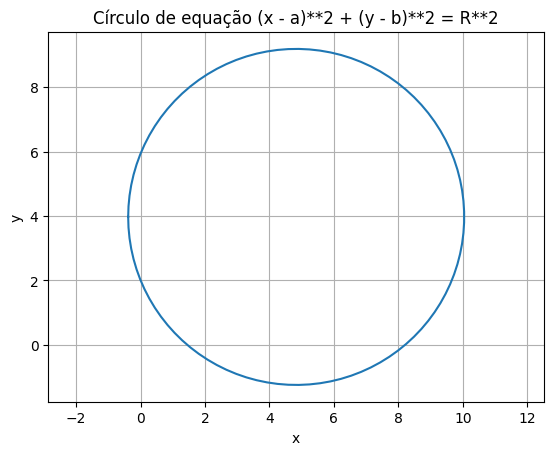

In [ ]:
# d

# Plota o gráfico da equação do círculo do problema em questão

a = 4.8301057
b = 3.9699217
R = -5.2138243

theta = np.linspace(0, 2*np.pi, 100)
x = a + R * np.cos(theta)
y = b + R * np.sin(theta)

plt.plot(x, y)
plt.axis('equal') # Utilizado para garantir que os eixos x e y estejam na mesma escala
plt.grid(True)
plt.title('Círculo de equação (x - a)**2 + (y - b)**2 = R**2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
